# Library Setup

In [1]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data Import and Graph Creation

In [2]:
edges_df = pd.read_csv('../data/gephi-edge-list.csv')
nodes_df = pd.read_csv('../data/gephi-node-list.csv')

G = nx.Graph() 

# Add nodes
for _, row in nodes_df.iterrows():
    node_id = row['ID']
    attributes = row.drop('ID').to_dict()
    G.add_node(node_id, **attributes)

# Add edges with weights
for _, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Statistics

In [3]:
# Number of Nodes
nx.number_of_nodes(G)

1962

In [4]:
# Number of Edges
nx.number_of_edges(G)

42758

In [5]:
# Number of Components
nx.number_connected_components(G)

2

In [6]:
# Clustering Coefficient
np.mean(list(nx.clustering(G).values()))

0.633463339319892

In [7]:
# Shortest Path Length (Of Largest Component)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
Largest_G = G.subgraph(Gcc[0])

nx.average_shortest_path_length(Largest_G,weight=None)

2.562129900404833

In [11]:
nx.number_of_nodes(Largest_G)

1961

# Degree Distribution

In [8]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees) + 1
kmax = max(degrees)

In [10]:
# Mean Degree
np.average(degrees)

43.586136595310904

### Log Scale

In [25]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

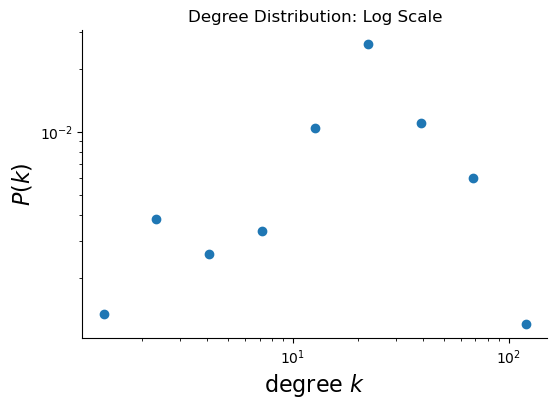

In [26]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title('Degree Distribution: Log Scale')

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

### Linear-Linear Scale

In [27]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

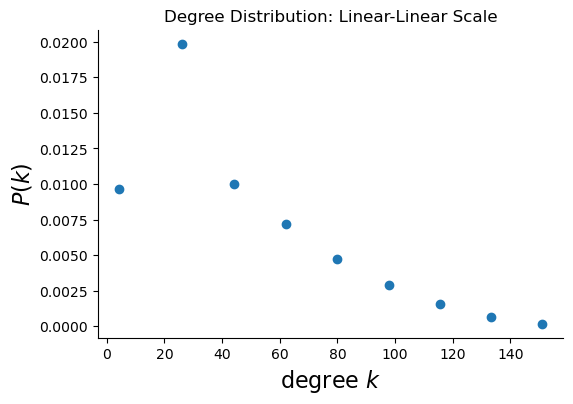

In [28]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title('Degree Distribution: Linear-Linear Scale')

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()